In [1]:
%tensorflow_version 1.x
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import style

TensorFlow 1.x selected.


In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = '/content/'
%cd /content/
!kaggle datasets download -d grassknoted/asl-alphabet

In [ ]:
!unzip asl-alphabet.zip

In [2]:
train_imgs_path="/content/asl_alphabet_train/asl_alphabet_train"
classes = os.listdir(train_imgs_path)

In [3]:
#reading images:
def read_image(img_path):
  img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
  img = np.array(img)
  img = cv2.resize(img,(50,50))
  img = img/255.0
  return img

train_data = []
test_data = []

for i in range(len(classes)):
  print(classes[i])
  files = os.listdir(train_imgs_path + '/' +   classes[i] )
  path = train_imgs_path + '/' + classes[i]
  c=0
  for file_s in files:
    image = read_image(path +'/' + file_s)
    train_data.append([image,i])
    c+=1
    if c%1000 ==0:
      print(c)

F
1000
2000
3000
L
1000
2000
3000
Q
1000
2000
3000
M
1000
2000
3000
D
1000
2000
3000
B
1000
2000
3000
U
1000
2000
3000
S
1000
2000
3000
K
1000
2000
3000
nothing
1000
2000
3000
O
1000
2000
3000
J
1000
2000
3000
P
1000
2000
3000
space
1000
2000
3000
I
1000
2000
3000
C
1000
2000
3000
H
1000
2000
3000
Y
1000
2000
3000
V
1000
2000
3000
N
1000
2000
3000
Z
1000
2000
3000
W
1000
2000
3000
del
1000
2000
3000
G
1000
2000
3000
R
1000
2000
3000
A
1000
2000
3000
T
1000
2000
3000
X
1000
2000
3000
E
1000
2000
3000


In [4]:
#Generate Datasets
def generate_data(data):
    imgs= []
    labels=[]
    for i in (data):
        imgs.append(i[0])
        labels.append(i[1])
    imgs = np.float32(imgs)    
    return imgs,labels

imgs,labels = generate_data(train_data)  

imgs = np.float32(imgs)
labels=np.float32(labels)
del train_data

**VISUALISING THE IMAGES**

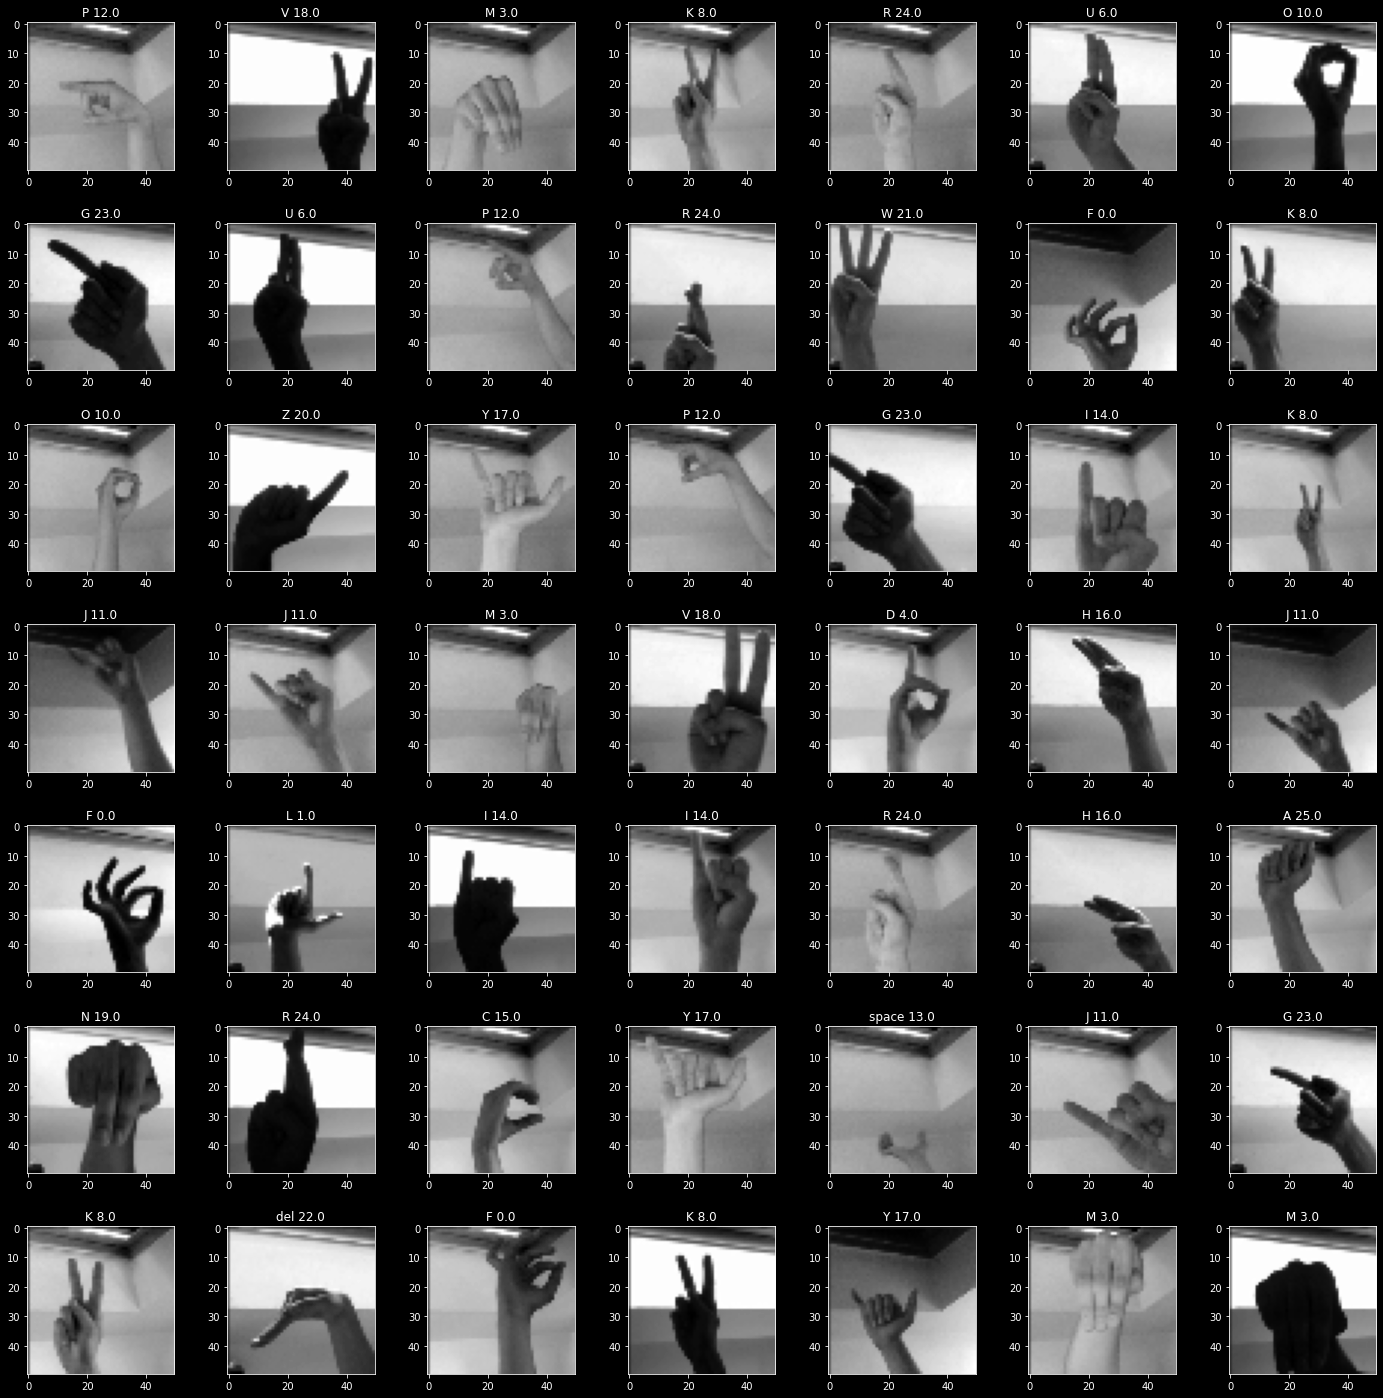

In [10]:
int_to_class={}
for i in range(len(classes)):
    int_to_class[i] = classes[i]
r=0
style.use('dark_background')
fig,ax = plt.subplots(7,7,figsize=(20,20))
for i in range(ax.shape[0]):
    for u in range(ax.shape[1]):
        fig.tight_layout(pad=3.0)
        r=np.random.randint(0,80000)
        ax[i,u].imshow(imgs[r],cmap='gray')
        title = int_to_class[labels[r]] + " " +str(labels[r])
        ax[i,u].set_title(title)

In [5]:
#generates mini batches
def mini_batches(train_images,train_labels,batch_size=128):
    m = len(train_images)
    permutation = list(np.random.permutation(m))
    shuffled_X = train_images[permutation,:,:,:]
    shuffled_Y = train_labels[permutation,:]
    num_batches = int(np.floor(m/batch_size))
    batches=[]
    for i in range(num_batches):
        batch_x = shuffled_X[i * batch_size : i * batch_size + batch_size,:,:,:]
        batch_y = shuffled_Y[i * batch_size :i*batch_size + batch_size,:]
        batches.append([batch_x,batch_y])
    return batches

In [6]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(imgs,labels,test_size=0.2)

In [7]:
#one_hot encoding
from tensorflow.python.keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [8]:
#placeholders
X = tf.placeholder(tf.float32,shape=(None,50,50,1))
Y = tf.placeholder(tf.float32,shape = (None,29))

In [ ]:
#Conv_layer 1
initializer = tf.contrib.layers.xavier_initializer()
l_w1 = tf.Variable(initializer((3,3,1,16)),name = "layer1_W")
l_b1 = tf.Variable(initializer([16]),name = 'layer1_b')
conv1  = tf.nn.relu(tf.nn.conv2d(X,l_w1,strides = [1,1,1,1],padding= "SAME") + l_b1)

Image Shape: (1, 50, 50, 16)


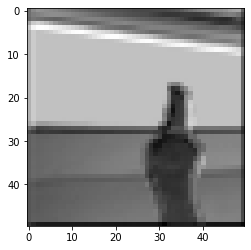

In [21]:
#passing the image through Conv1 layer
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    img = sess.run(conv1,feed_dict = {X:X_train[2].reshape(1,50,50,1)})
    print("Image Shape:",img.shape)
plt.imshow(img[0,:,:,2],cmap='gray')  #Visualising one channel from 16   


In [22]:
#layer_ 2
l_w2 = tf.Variable(initializer((3,3,16,32)),name = 'layer2_w')
l_b2 = tf.Variable(initializer([32]),name = 'layer2_b')
conv2 = tf.nn.relu(tf.nn.conv2d(conv1,l_w2,strides = [1,1,1,1],padding="SAME") + l_b2)
pool2 = tf.nn.max_pool(conv2,ksize= [1,2,2,1],strides=[1,2,2,1],padding="SAME")

Image Shape: (1, 25, 25, 32)


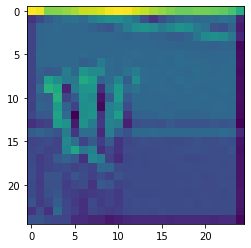

In [24]:
#passing throught layer 2 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    img = sess.run(pool2,feed_dict = {X:X_train[0].reshape(1,50,50,1)})
    print("Image Shape:",img.shape)
plt.imshow(img[0,:,:,2])  #Visualising one channel from 32

In [25]:
#layer3_conv
l_w3 = tf.Variable(initializer((3,3,32,32)),name = "layer3_w")
l_b3 = tf.Variable(initializer([32]),name = "layer3_b")
conv3 = tf.nn.relu(tf.nn.conv2d(conv2,l_w3,strides=[1,1,1,1],padding="SAME") + l_b3)

In [26]:
#layer4_conv
l_w4 = tf.Variable(initializer((3,3,32,64)),name = "layer4_w")
l_b4 = tf.Variable(initializer([64]),name='layer4_b')
conv4 = tf.nn.relu(tf.nn.conv2d(conv3,l_w4,strides = [1,1,1,1],padding="SAME") + l_b4)
pool4 = tf.nn.max_pool(conv4,ksize = [1,3,3,1],strides=[1,2,2,1],padding="SAME")

Image Shape: (1, 25, 25, 64)


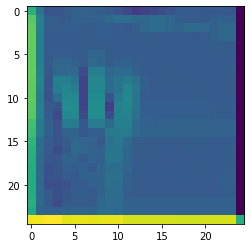

In [32]:
#passing throught layer 4
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    img = sess.run(pool4,feed_dict = {X:X_train[0].reshape(1,50,50,1)})
    print("Image Shape:",img.shape)
plt.imshow(img[0,:,:,3])  #Visualising one channel from 64

In [33]:
#conv_layer 5 
l_w5 = tf.Variable(initializer((3,3,64,128)),name = "layer5_w")
l_b5 = tf.Variable(initializer([128]),name = "l_b5")
conv5 = tf.nn.relu(tf.nn.conv2d(pool4,l_w5,strides=[1,1,1,1],padding="SAME") + l_b5)
pool5 = tf.nn.max_pool(conv5,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
#Conv Layer 6
l_w6 = tf.Variable(initializer((3,3,128,512)),name = "layer6_w")
l_b6= tf.Variable(initializer([512]),name = "l_b6")
conv6 = tf.nn.relu(tf.nn.conv2d(pool5,l_w6,strides=[1,1,1,1],padding="SAME") + l_b6)


Image Shape: (1, 13, 13, 512)


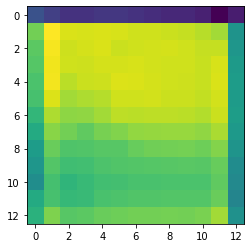

In [43]:
#passing the image through layer 6
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    img = sess.run(conv6,feed_dict = {X:X_train[0].reshape(1,50,50,1)})
    print("Image Shape:",img.shape)
plt.imshow(img[0,:,:,4])  #Visualising one channel from 512

In [46]:
#Flatten
flatten = tf.Variable(initializer([13*13*512*1,128]),name ="flatten")
flatten_b = tf.Variable(initializer([128]),name = "flatten_b")
#Fully_connected layer 1
fc1 = tf.nn.relu(tf.matmul(tf.reshape(conv6,[-1,13*13*512*1]),flatten) + flatten_b)

In [47]:
#Fully_connected layer 2
fc2_w = tf.Variable(initializer([128,512]),name="fc2_w")
fc2_b = tf.Variable(initializer([512]),name = "fc2_b")
fc2 = tf.nn.relu(tf.matmul(fc1,fc2_w) + fc2_b)

In [48]:
#output layer
out_w = tf.Variable(initializer([512,29]),name = "out")
out_b = tf.Variable(initializer([29]),name = "out_b")
out = tf.matmul(fc2,out_w) + out_b #not applying softmax as it is applied in "tf.nn.softmax_cross_entropy_with_logits"
out_s = tf.nn.softmax(out) #applying softmax for prediction

In [53]:
learning_rate = 1e-4
#Loss Calculations
entropy = tf.nn.softmax_cross_entropy_with_logits(logits = out,labels = Y)
loss = tf.reduce_mean(entropy)
#Calculating accuracy
c_p = tf.equal(tf.argmax(out_s,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(c_p,tf.float32))
#Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [50]:
#reshaping to be fed to placeholders
X_train = np.reshape(X_train,(-1,50,50,1))
X_test = np.reshape(X_test,(-1,50,50,1))

**TRAINING LOOP**

In [65]:
nepochs = 10
batch_size=64
n_batches = int(X_train.shape[0]/ batch_size)
closs=[] #for plotting losses
cacc = [] #for plotting accuracies
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(nepochs):
        batch_loss=0.0
        batch_accuracy = 0.0
        minibatches = mini_batches(X_train,Y_train,batch_size=batch_size)
        for minibatch in minibatches:
            batch_x,batch_y = minibatch
            feed_dict_train = {X:batch_x,Y:batch_y}
            b_loss,_ = sess.run([loss,optimizer],feed_dict = feed_dict_train)
            train_acc = accuracy.eval(feed_dict = {X:batch_x,Y:batch_y})
            batch_loss+= b_loss
            batch_accuracy +=train_acc 
        average_loss = batch_loss / n_batches * 100
        average_acc = batch_accuracy / n_batches * 100
        closs.append(average_loss)
        cacc.append(average_acc)
        print("Epoch: {0} ==> \n TRAIN LOSS = {1:0.6f} TRAIN ACCURACY: {2:0.6f}".format(epoch + 1,average_loss,average_acc))
    #test_accuracy
    test_acc = accuracy.eval(feed_dict={X:X_test[:5000].reshape(-1,50,50,1),Y:Y_test[:5000]}) 
    print("\nTEST ACCURACY: {}".format(test_acc * 100))   
    


Epoch: 1 ==> 
 TRAIN LOSS = 180.925368 TRAIN ACCURACY: 47.495975
Epoch: 2 ==> 
 TRAIN LOSS = 45.500537 TRAIN ACCURACY: 87.439627
Epoch: 3 ==> 
 TRAIN LOSS = 21.663050 TRAIN ACCURACY: 94.698712
Epoch: 4 ==> 
 TRAIN LOSS = 14.370672 TRAIN ACCURACY: 96.875000
Epoch: 5 ==> 
 TRAIN LOSS = 10.275260 TRAIN ACCURACY: 98.082452
Epoch: 6 ==> 
 TRAIN LOSS = 7.856400 TRAIN ACCURACY: 98.632992
Epoch: 7 ==> 
 TRAIN LOSS = 6.408503 TRAIN ACCURACY: 98.995228
Epoch: 8 ==> 
 TRAIN LOSS = 5.521395 TRAIN ACCURACY: 99.212282
Epoch: 9 ==> 
 TRAIN LOSS = 5.443782 TRAIN ACCURACY: 99.268342
Epoch: 10 ==> 
 TRAIN LOSS = 3.655783 TRAIN ACCURACY: 99.588891

TEST ACCURACY: 97.96000123023987


**PLOTTING TRAIN LOSS AND TRAIN ACCURACY**



Text(0, 0.5, 'Loss over each epoch')

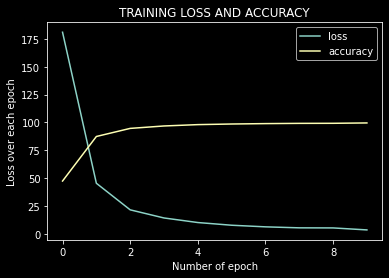

In [66]:
#number of epochs
sepochs = [x for x in range(len(closs))]
style.use("dark_background")
plt.plot(sepochs,closs,label = "loss")
plt.plot(sepochs,cacc,label = 'accuracy')
plt.legend()
plt.title("TRAINING LOSS AND ACCURACY")
plt.xlabel("Number of epoch")
plt.ylabel("Loss over each epoch")